<a href="https://colab.research.google.com/github/Lacikaki7/AI_project1/blob/main/Beadando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

Context
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load.

**Content**

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

**Acknowledgements**

This dataset is shared in a good intention to public to get familiar on Linear Regression on Multicollinery data.

**Inspiration**

Your data will be in front of the world's largest data science community. What questions do you want to see answered?

# I. Data preparation

### Pre-preparation

There are originally two files for the Kaggle competition: https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate

Test.csv ---> For testing and submission
Train.csv ---> For training
In Test.csv there aren't included the target values, only the features. This is because, it was the main part of the competition to upload the own predictions on this part of the data to Kaggle.

In [73]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Lacikaki7/AI_project1/main/Train.csv?token=GHSAT0AAAAAACJ7ZDHCVTB35RJNBFZ3CGTKZKKRLOQ")

In [74]:
df.head()

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [75]:
len(df)

9568

In [76]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [77]:
duplicates_index = df[df.duplicated(keep="first")].index
duplicates_index

Int64Index([], dtype='int64')

**Overview: Structure of the Data preparation part.**

1.   Splitting the data to training and testing sets. We'll keep them separately, because testing data should be unseen.
2.   Data exploration in the training set
3.   Looking for outliers in the training set and drop them.
4.   Filling the missing values in the training set, drop the missing values in the test set to get realistic test results.
5.   Standardizing both datasets with the mean and standard deviation from the training set.

## 1. Splitting to training and testing sets

In [78]:
from sklearn.model_selection import train_test_split

X = df.drop("PE", axis=1)
y = df["PE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
len(X_train), len(X_test), len(y_train), len(y_test)

(6697, 2871, 6697, 2871)

In [79]:
X_train.head()

,AT,V,AP,RH
8822,29.50,71.14,1011.27,52.81
3392,29.85,71.58,1010.04,58.66
6928,24.67,58.05,1011.31,69.95
1392,12.31,37.73,1023.30,63.01
6983,15.52,42.86,1015.09,83.48


## 2. Data exploration in the training set

In [80]:
X_train.isnull().sum()

AT    0
V     0
AP    0
RH    0
dtype: int64

In [81]:
y_train.isnull().sum()

0

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6697 entries, 8822 to 2191
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6697 non-null   float64
 1   V       6697 non-null   float64
 2   AP      6697 non-null   float64
 3   RH      6697 non-null   float64
dtypes: float64(4)
memory usage: 261.6 KB


In [83]:
X_train.describe()

,AT,V,AP,RH
count,6697.000000,6697.000000,6697.000000,6697.000000
mean,19.602909,54.251284,1013.337750,73.150222
std,7.400700,12.645069,5.894129,14.648002
min,2.340000,25.360000,994.600000,25.890000
25%,13.460000,41.700000,1009.210000,62.980000
50%,20.380000,52.050000,1013.070000,74.830000
75%,25.650000,66.510000,1017.290000,84.900000
max,35.770000,80.180000,1033.250000,100.160000


### Plotting

**Scatter plots**

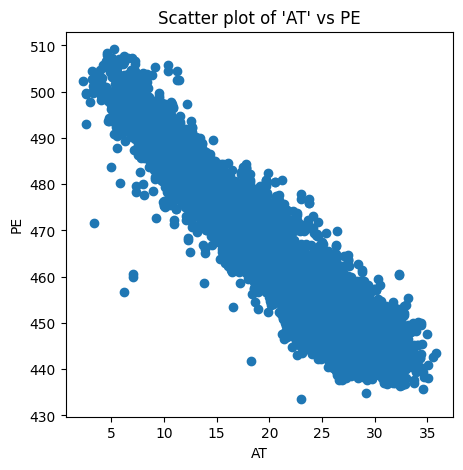

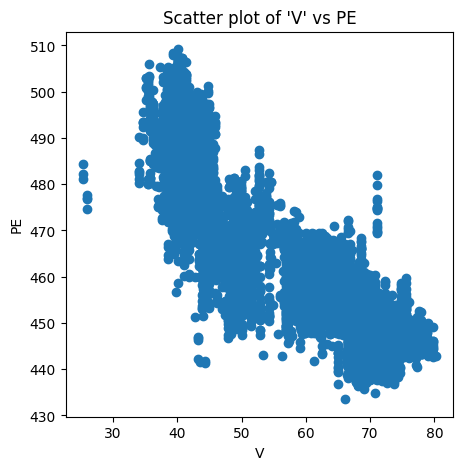

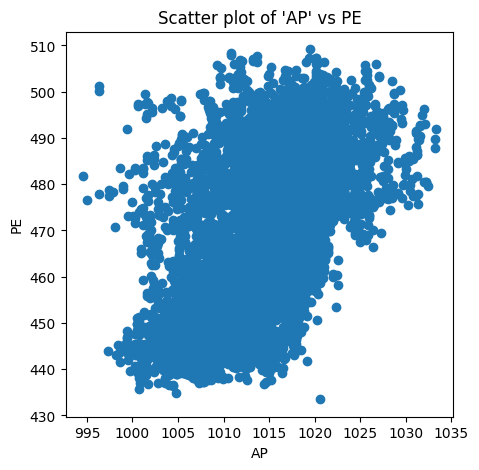

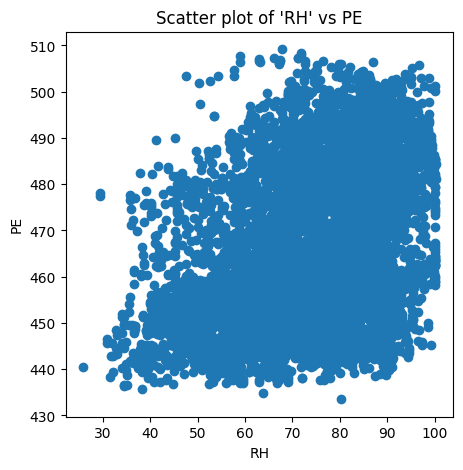

In [84]:
import matplotlib.pyplot as plt

column_names = list(X_train.columns)
for column in column_names:
    plt.figure(figsize=(5, 5))
    plt.scatter(x=X_train[column], y=y_train)
    plt.title(f"Scatter plot of '{column}' vs PE")
    plt.xlabel(column)
    plt.ylabel("PE")
    plt.show()
    print("\n")

**Boxplots**

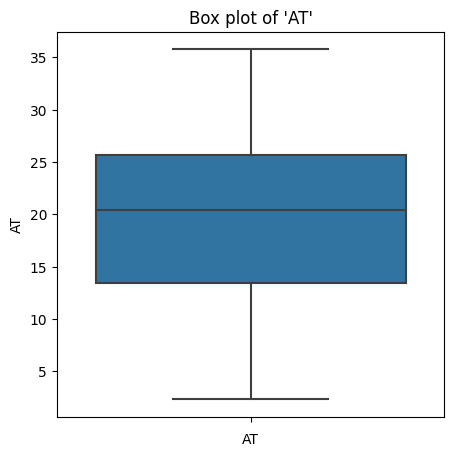

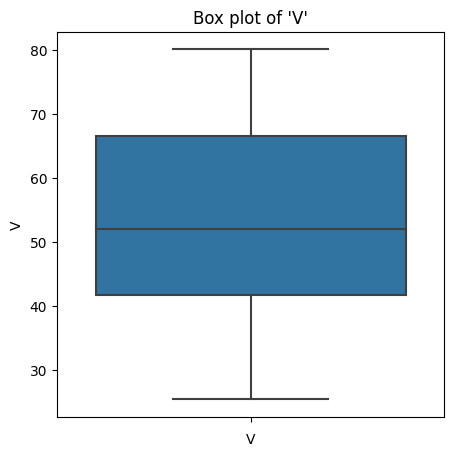

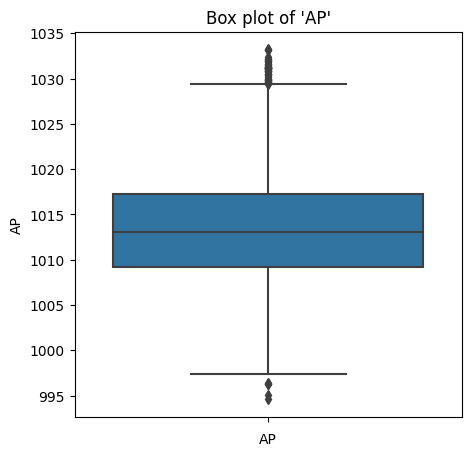

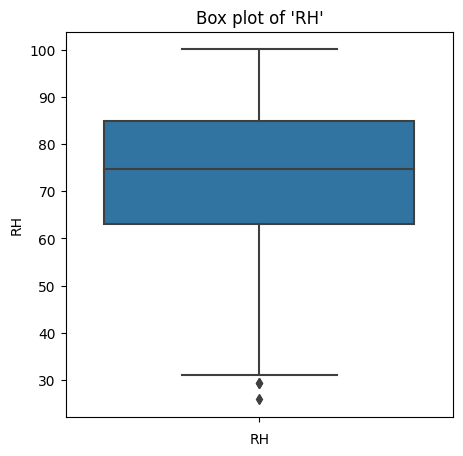

In [85]:
import seaborn as sns

for column in column_names:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=X_train[column])
    plt.title(f"Box plot of '{column}'")
    plt.xlabel(column)
    plt.show()
    print("\n")

**Histograms**

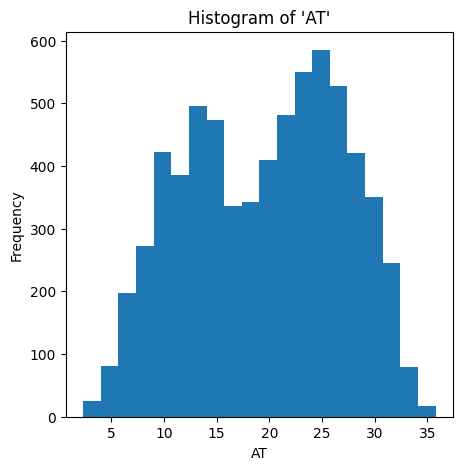

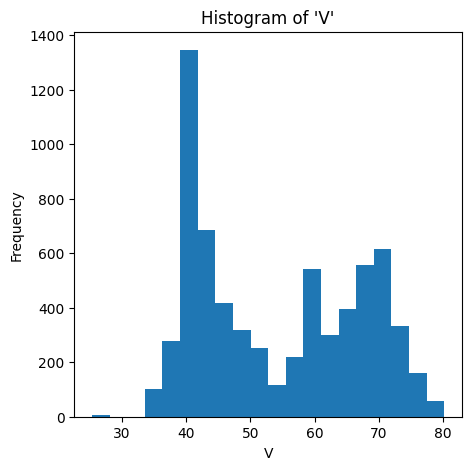

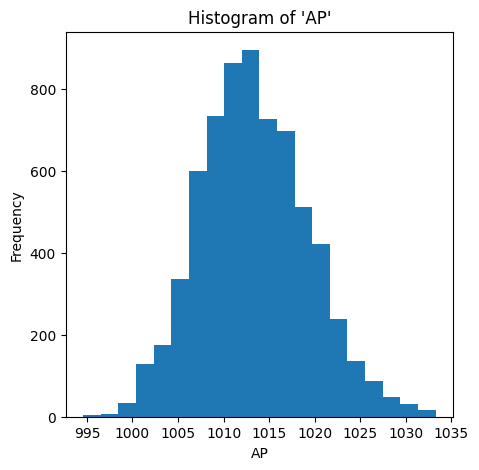

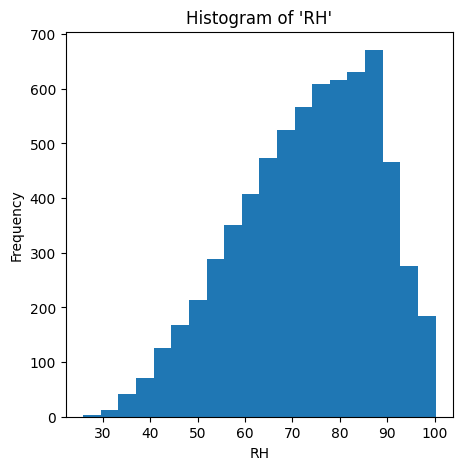

In [86]:
for column in column_names:
    plt.figure(figsize=(5, 5))
    plt.hist(X_train[column], bins=20)
    plt.title(f"Histogram of '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    print("\n")

**Correlations**

In [87]:
df_train = X_train.copy()
df_train["target_class"] = y_train
df_train.corr()

,AT,V,AP,RH,target_class
AT,1.000000,0.840991,-0.517999,-0.541392,-0.946460
V,0.840991,1.000000,-0.411434,-0.306076,-0.866048
AP,-0.517999,-0.411434,1.000000,0.121872,0.523469
RH,-0.541392,-0.306076,0.121872,1.000000,0.388347
target_class,-0.946460,-0.866048,0.523469,0.388347,1.000000


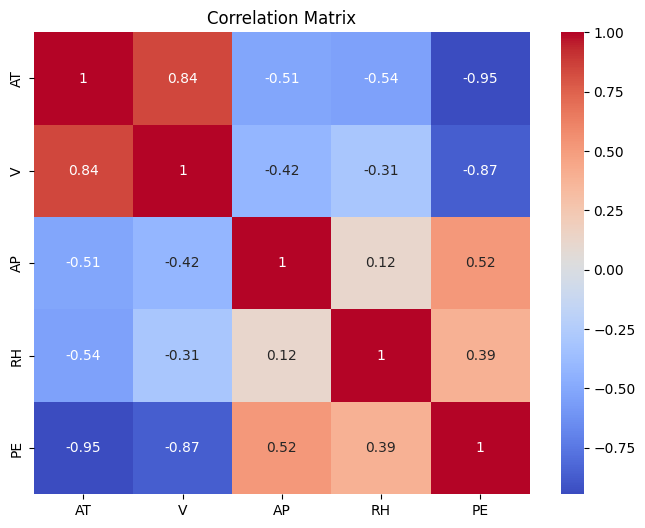

In [88]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 3. Standardizing

In [89]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std

X_train_scaled.head()

,AT,V,AP,RH
8822,1.337318,1.335597,-0.350815,-1.388600
3392,1.384611,1.370393,-0.559497,-0.989229
6928,0.684677,0.300411,-0.344029,-0.218475
1392,-0.985435,-1.306540,1.690199,-0.692260
6983,-0.551692,-0.900848,0.297287,0.705200


In [90]:
X_test_scaled.head()

,AT,V,AP,RH
8080,0.167159,-0.242093,-0.798719,0.748210
3810,0.695487,1.236744,0.331219,0.604845
6421,1.694041,1.647181,-1.355205,-1.585897
2727,0.588740,-0.233394,-0.259199,-0.091495
8830,1.300835,1.213020,-0.735944,-0.118803


In [91]:
len(X_test_scaled)

2871

# II. Models: Training, evaluating and tuning

We'll use:
0.   Logistic regression as baseline model
1.   Random forest
2.   XGBoost

## 0. Logistic regression --- Baseline model

Mean Squared Error (MSE): 21.68
R-squared (R^2): 0.93



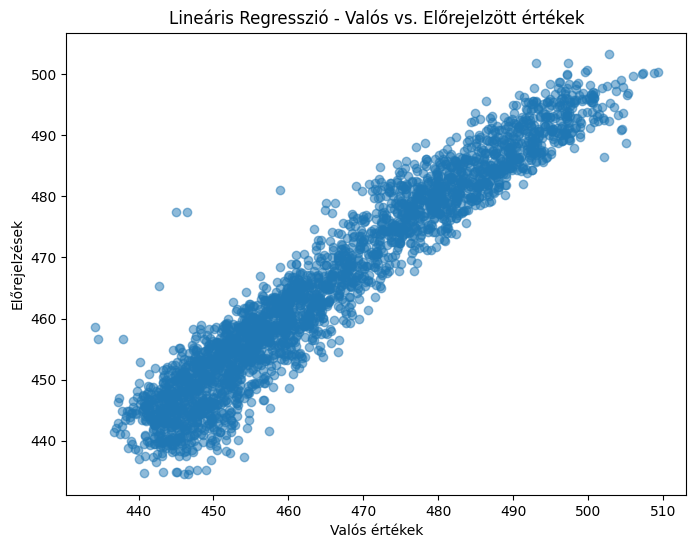

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}\n")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valós értékek")
plt.ylabel("Előrejelzések")
plt.title("Lineáris Regresszió - Valós vs. Előrejelzött értékek")
plt.show()

## 1. Random forest

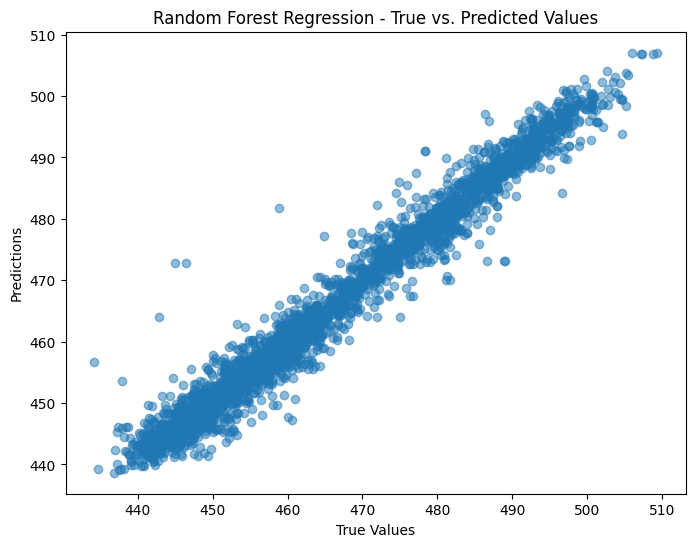

Random Forest Regression Results:
Train Mean Squared Error (MSE): 1.40
Train R-squared (R^2): 1.00
Test Mean Squared Error (MSE): 8.97
Test R-squared (R^2): 0.97


In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

results_rf = {}

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

rf_y_pred_train = rf_model.predict(X_train_scaled)
rf_y_pred_test = rf_model.predict(X_test_scaled)

rf_mse_train = mean_squared_error(y_train, rf_y_pred_train)
rf_mse_test = mean_squared_error(y_test, rf_y_pred_test)
rf_r2_train = r2_score(y_train, rf_y_pred_train)
rf_r2_test = r2_score(y_test, rf_y_pred_test)

results_rf["Train"] = [rf_mse_train, rf_r2_train]
results_rf["Test"] = [rf_mse_test, rf_r2_test]

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred_test, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regression - True vs. Predicted Values")
plt.show()

print("Random Forest Regression Results:")
print(f"Train Mean Squared Error (MSE): {rf_mse_train:.2f}")
print(f"Train R-squared (R^2): {rf_r2_train:.2f}")
print(f"Test Mean Squared Error (MSE): {rf_mse_test:.2f}")
print(f"Test R-squared (R^2): {rf_r2_test:.2f}")

## 2. XGBoost

XGBoost Mean Squared Error (MSE): 9.05
XGBoost R-squared (R^2): 0.97


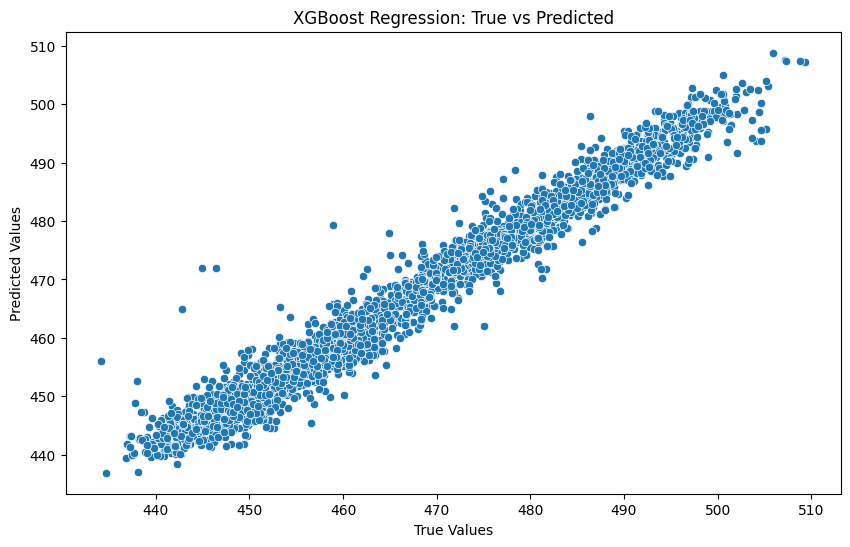

In [100]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train_scaled, y_train)

xgb_y_pred = xgb_model.predict(X_test_scaled)

xgb_mse = mean_squared_error(y_test, xgb_y_pred)

xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f"XGBoost Mean Squared Error (MSE): {xgb_mse:.2f}")
print(f"XGBoost R-squared (R^2): {xgb_r2:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=xgb_y_pred)
plt.title('XGBoost Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

Conclusion: the best model with the chosen score (highest balanced accuracy on the test set) is Random forest.

In [103]:
test_df = pd.read_csv("https://raw.githubusercontent.com/Lacikaki7/AI_project1/main/Test.csv?token=GHSAT0AAAAAACJ7ZDHCVTB35RJNBFZ3CGTKZKKRLOQ")
real_PE = pd.read_csv("https://raw.githubusercontent.com/Lacikaki7/AI_project1/main/sample_submission.csv")

X_test_custom = test_df

X_test_scaled = (X_test_custom - X_train_mean) / X_train_std

rf_model.fit(X_train_scaled, y_train)

y_pred_test = rf_model.predict(X_test_scaled)

test_df['Real_PE'] = real_PE
test_df['PE_Predicted'] = y_pred_test

print(test_df.head())


      AT      V       AP     RH     Real_PE  PE_Predicted
0  16.98  53.16  1013.95  82.80  472.459382    471.933327
1   9.60  41.03  1021.01  69.03  493.673699    492.522244
2   6.11  38.68  1017.53  79.23  496.046368    496.008605
3  12.34  43.22  1009.28  78.23  480.007971    480.809979
4  27.67  59.14  1016.51  61.20  445.407637    446.638993


# III. Other type of tuning for the imbalanced dataset problem

In [96]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.random.randint(50, 150, size=10),
    'max_depth': [None] + list(np.random.randint(10, 30, size=5)),
    'min_samples_split': np.random.randint(2, 10, size=5),
    'min_samples_leaf': np.random.randint(1, 4, size=5)
}

rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20,
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_search.fit(X_train_scaled, y_train)

best_params_random = random_search.best_params_
print("Legjobb paraméterek véletlenszerű keresés esetén:", best_params_random)

best_rf_model_random = random_search.best_estimator_

best_rf_y_pred_random = best_rf_model_random.predict(X_test_scaled)

best_rf_mse_random = mean_squared_error(y_test, best_rf_y_pred_random)

best_rf_r2_random = r2_score(y_test, best_rf_y_pred_random)

print(f"Legjobb Random Forest Mean Squared Error (MSE) véletlenszerű keresés esetén: {best_rf_mse_random:.2f}")
print(f"Legjobb Random Forest R-squared (R^2) véletlenszerű keresés esetén: {best_rf_r2_random:.2f}")


Legjobb paraméterek véletlenszerű keresés esetén: {'n_estimators': 128, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 20}
Legjobb Random Forest Mean Squared Error (MSE) véletlenszerű keresés esetén: 9.15
Legjobb Random Forest R-squared (R^2) véletlenszerű keresés esetén: 0.97


In [98]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

for column in X_train.columns:
    indices_to_keep = remove_outliers(X_train, column).index
    X_train = X_train.loc[indices_to_keep]
    y_train = y_train.loc[indices_to_keep]

X_train_scaled = (X_train - X_train_mean) / X_train_std

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

X_test_scaled = (X_test - X_train_mean) / X_train_std
y_pred_test = rf_model.predict(X_test_scaled)

test_df.reset_index(drop=True, inplace=True)

test_df['PE_Predicted_Refined'] = pd.Series(y_pred_test)

print(test_df.head())


      AT      V       AP     RH  PE_Predicted  PE_Predicted_Refined
0  16.98  53.16  1013.95  82.80    471.755620            460.788875
1   9.60  41.03  1021.01  69.03    492.905379            450.553543
2   6.11  38.68  1017.53  79.23    496.518313            450.472221
3  12.34  43.22  1009.28  78.23    480.855051            460.909881
4  27.67  59.14  1016.51  61.20    446.352509            449.430099
